In [29]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import matplotlib
import mglearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [13]:
X,y = mglearn.datasets.make_forge() 

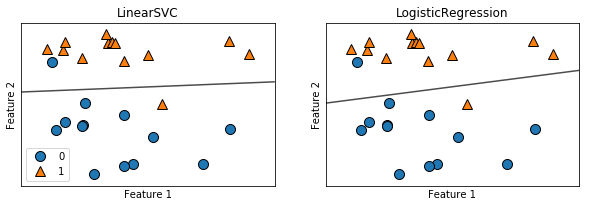

In [17]:
fig, axes = plt.subplots(1,2,figsize=(10,3))
for model, ax in zip([LinearSVC(),LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X,fill=False, eps=0.5, ax=ax,alpha=0.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    
axes[0].legend()

## LinearLogistic on Breast Cancer dataset

In [37]:
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train,y_train)
print("Training set score: {:,.3f}".format(logreg.score(X_train,y_train)))
print("Test set score: {:,.3f}".format(logreg.score(X_test,y_test)))

Training set score: 0.955
Test set score: 0.958


Default C=1. Training and test score are close, which indicts a likely underfitting.

We increase C to fit a more flexible model.

In [38]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print("Training set score: {:,.3f}".format(logreg100.score(X_train,y_train)))
print("Test set score: {:,.3f}".format(logreg100.score(X_test,y_test)))

Training set score: 0.972
Test set score: 0.965


A more complex model performs better.

In [39]:
logreg01 = LogisticRegression(C=0.01).fit(X_train,y_train)
print("Training set score: {:,.3f}".format(logreg01.score(X_train,y_train)))
print("Test set score: {:,.3f}".format(logreg01.score(X_test,y_test)))

Training set score: 0.934
Test set score: 0.930


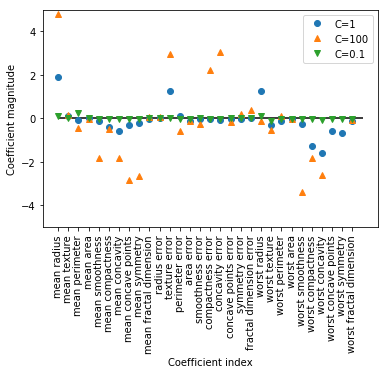

In [51]:
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg01.coef_.T,'v',label="C=0.1")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

If one desiers a more interpretable model, using L1 regularization might be helpful, as it limits the model to using only a few features.

Training accuracy fo L1 logreg with c=0.001:0.92
Test accuracy fo L1 logreg with c=0.001:0.94
Training accuracy fo L1 logreg with c=1.000:0.96
Test accuracy fo L1 logreg with c=1.000:0.96
Training accuracy fo L1 logreg with c=100.000:0.97
Test accuracy fo L1 logreg with c=100.000:0.97


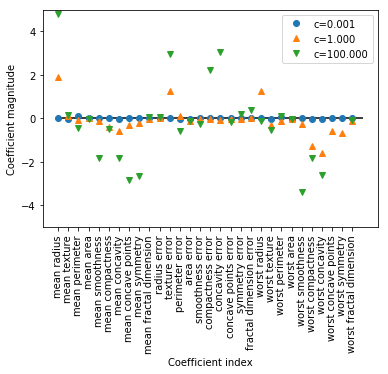

In [63]:
for C, marker in zip([0.001,1,100],['o','^','v']):
    lr_l1=LogisticRegression(C=C).fit(X_train,y_train)
    print("Training accuracy fo L1 logreg with c={:,.3f}:{:,.2f}".format(C,lr_l1.score(X_train,y_train)))
    print("Test accuracy fo L1 logreg with c={:,.3f}:{:,.2f}".format(C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T,marker,label="c={:,.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5,5)
plt.legend(loc=1)

# Linear models for multiclass classification

One approach is one-vs-rest. Many binary models are run and the classifier with the highest score wins.

## One-vs-rest

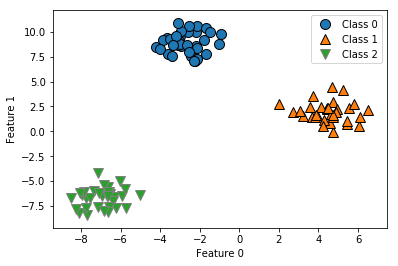

In [64]:
from sklearn.datasets import make_blobs

X,y=make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1","Class 2"])

Now, we train a LinearSVC classifier on the dataset:

In [68]:
linear_svm = LinearSVC().fit(X,y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


Let's visualize the lines given by the three binary classifiers.

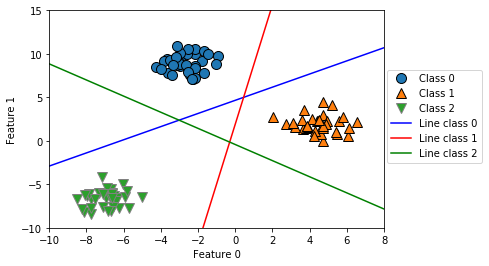

In [78]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef,intercept, color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
    
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1","Class 2", "Line class 0","Line class 1","Line class 2"], loc=(1.01,0.3))